In [115]:
import numpy as np
from datascience import *
import pandas as pd
import os
from scipy.stats import ttest_ind
from scipy.stats import sem

from scipy.stats import ttest_1samp
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [116]:
pwd


'/home/jovyan/octo'

In [117]:
N = "no match"
Y = "match"

answerkey = make_array(
N,
Y,
Y,
Y,
N,
N,
N,
Y,
N,
Y,
Y,
N,
N,
N,
N,
Y,
Y,
N,
Y,
Y,
N,
Y,
Y,
Y,
Y,
Y,
Y,
N,
Y,
Y,
N,
Y,
Y,
Y,
N,
N,
Y,
N,
Y,
Y,
N,
Y,
N,
N,
Y,
N,
Y,
Y,
N,
N,)

len(answerkey)

50

In [118]:
Bres = Table.read_table('Bresponses.3-1-21.csv')
Bres = Bres.with_columns("label", ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V"])

In [119]:
Cres = Table.read_table('Cresponses.3-1-21.csv')
Cres = Cres.with_columns("label", ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v"])

In [120]:
Bres

Timestamp,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,label
4/26/2020 23:40:38,no match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,no match,no match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,no match,match,match,match,A
4/27/2020 3:36:17,no match,match,match,match,no match,no match,no match,match,no match,match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,no match,match,no match,no match,no match,B
5/7/2020 2:46:27,no match,match,match,match,match,match,no match,match,match,match,match,match,no match,no match,no match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,match,no match,match,no match,match,match,match,match,no match,match,match,no match,match,match,no match,no match,C
5/7/2020 10:13:05,no match,no match,match,match,no match,no match,no match,match,match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,no match,no match,match,no match,match,match,no match,no match,D
5/7/2020 13:31:50,no match,match,match,match,match,match,no match,match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,match,E
5/7/2020 21:10:43,no match,match,match,match,match,no match,no match,match,no match,no match,match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,no match,F
5/8/2020 20:11:18,no match,match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,no match,G
5/8/2020 23:24:03,no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,no match,no match,H
6/10/2020 9:12:17,no match,match,match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,match,match,match,match,match,no match,no match,match,match,match,no match,no match,no match,no

In [121]:
Cres.show(50)

Timestamp,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,label
4/26/2020 23:43:45,no match,no match,match,match,match,match,no match,match,no match,no match,match,no match,no match,no match,no match,match,nan,no match,no match,match,no match,no match,match,match,match,no match,no match,no match,no match,no match,no match,match,match,match,no match,no match,no match,no match,match,nan,match,match,no match,no match,no match,no match,match,match,match,no match,a
5/9/2020 19:34:14,no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,no match,no match,no match,no match,no match,no match,no match,match,no match,no match,b
6/11/2020 12:01:40,no match,no match,match,match,no match,no match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,match,match,no match,match,no match,no match,c
6/15/2020 19:23:33,no match,match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,match,match,match,no match,match,match,match,match,match,match,match,match,no match,match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,no match,d
6/15/2020 19:25:14,match,no match,match,no match,match,match,no match,no match,no match,match,match,match,no match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,match,no match,match,no match,no match,no match,no match,match,no match,match,match,match,match,no match,e
6/15/2020 19:41:50,match,match,match,match,no match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,match,no match,match,no match,no match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,no match,match,no match,match,match,no match,match,f
6/15/2020 19:49:12,no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,match,g
6/15/2020 20:22:31,no match,match,match,match,no match,match,no match,no match,no match,match,match,no match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,match,match,no match,no match,no match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,no match,h
6/15/2020 21:10:22,no match,no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,match,no match,no match,no match,match,match,no match,no match,no m

In [122]:
Bres1=Bres.drop(0)
Bres1

Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,label
no match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,no match,no match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,no match,match,match,match,A
no match,match,match,match,no match,no match,no match,match,no match,match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,no match,match,no match,no match,no match,B
no match,match,match,match,match,match,no match,match,match,match,match,match,no match,no match,no match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,match,no match,match,no match,match,match,match,match,no match,match,match,no match,match,match,no match,no match,C
no match,no match,match,match,no match,no match,no match,match,match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,no match,no match,match,no match,match,match,no match,no match,D
no match,match,match,match,match,match,no match,match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,match,E
no match,match,match,match,match,no match,no match,match,no match,no match,match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,no match,F
no match,match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,no match,G
no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,no match,no match,H
no match,match,match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,match,match,match,match,match,no match,no match,match,match,match,no match,no match,no match,no match,no match,no match,match,no match,match,match,match,match,no match,match,no match,no match,match,no match,no match,match,I
no match,match,match,match,no match,no matc

In [123]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [124]:
x = Table().with_columns("A",a).with_columns("B",np.arange(10, 20))

In [125]:
x

A,B
0,10
1,11
2,12
3,13
4,14
5,15
6,16
7,17
8,18
9,19


In [126]:
x[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [127]:
xr1 = x.row(1)

In [128]:
xr1

Row(A=1, B=11)

In [129]:
y = Table().with_columns("x", xr1)
y

x
1
11


In [130]:
Bres1

Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,label
no match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,no match,no match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,no match,match,match,match,A
no match,match,match,match,no match,no match,no match,match,no match,match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,no match,match,no match,no match,no match,B
no match,match,match,match,match,match,no match,match,match,match,match,match,no match,no match,no match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,match,no match,match,no match,match,match,match,match,no match,match,match,no match,match,match,no match,no match,C
no match,no match,match,match,no match,no match,no match,match,match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,no match,no match,match,no match,match,match,no match,no match,D
no match,match,match,match,match,match,no match,match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,match,E
no match,match,match,match,match,no match,no match,match,no match,no match,match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,no match,F
no match,match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,no match,G
no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,no match,no match,H
no match,match,match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,match,match,match,match,match,no match,no match,match,match,match,no match,no match,no match,no match,no match,no match,match,no match,match,match,match,match,no match,match,no match,no match,match,no match,no match,match,I
no match,match,match,match,no match,no matc

In [131]:
Bres.num_rows

22

In [132]:
Bres1[50][0]

'A'

In [133]:
Bres1.num_columns

51

In [134]:
Bres_flip = Table()
Bres_flip

In [135]:
for i in np.arange(0,Bres.num_rows):
    Bres_flip = Bres_flip.with_columns(Bres1[50][i], Bres1.row(i))

In [136]:
Bres_flip = Bres_flip.take(np.arange(50))

In [137]:
Bres_flip

A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V
no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,match,no match,match,match
match,match,match,no match,match,match,match,match,match,match,no match,match,match,match,match,match,no match,match,match,match,match,no match
match,match,match,match,match,match,match,match,match,match,match,match,match,match,match,match,match,no match,match,match,match,match
no match,match,match,match,match,match,match,match,no match,match,match,no match,match,no match,match,match,no match,match,no match,match,match,match
no match,no match,match,no match,match,match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,match,no match
match,no match,match,no match,match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,no match,match,no match
no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,no match,match,no match,no match,match,no match,match,match
match,match,match,match,match,match,match,no match,match,match,match,match,match,match,no match,no match,match,match,match,nan,match,match
match,no match,match,match,match,no match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,match,match,no match,match,match
no match,match,match,no match,no match,no match,no match,match,no match,match,match,no match,no match,match,no match,no match,match,no match,no match,match,no match,no match


In [138]:
Bres_flip[1]

array(['no match', 'match', 'match', 'match', 'no match', 'no match',
       'no match', 'match', 'no match', 'match', 'match', 'no match',
       'no match', 'no match', 'no match', 'match', 'match', 'no match',
       'match', 'match', 'no match', 'match', 'match', 'match', 'match',
       'match', 'no match', 'no match', 'match', 'match', 'no match',
       'match', 'match', 'match', 'no match', 'no match', 'match',
       'no match', 'match', 'match', 'no match', 'match', 'no match',
       'no match', 'match', 'no match', 'match', 'no match', 'no match',
       'no match'],
      dtype='<U8')

In [139]:
Bres1.row(1)

Row(Unnamed: 1='no match', Unnamed: 2='match', Unnamed: 3='match', Unnamed: 4='match', Unnamed: 5='no match', Unnamed: 6='no match', Unnamed: 7='no match', Unnamed: 8='match', Unnamed: 9='no match', Unnamed: 10='match', Unnamed: 11='match', Unnamed: 12='no match', Unnamed: 13='no match', Unnamed: 14='no match', Unnamed: 15='no match', Unnamed: 16='match', Unnamed: 17='match', Unnamed: 18='no match', Unnamed: 19='match', Unnamed: 20='match', Unnamed: 21='no match', Unnamed: 22='match', Unnamed: 23='match', Unnamed: 24='match', Unnamed: 25='match', Unnamed: 26='match', Unnamed: 27='no match', Unnamed: 28='no match', Unnamed: 29='match', Unnamed: 30='match', Unnamed: 31='no match', Unnamed: 32='match', Unnamed: 33='match', Unnamed: 34='match', Unnamed: 35='no match', Unnamed: 36='no match', Unnamed: 37='match', Unnamed: 38='no match', Unnamed: 39='match', Unnamed: 40='match', Unnamed: 41='no match', Unnamed: 42='match', Unnamed: 43='no match', Unnamed: 44='no match', Unnamed: 45='match', 

In [140]:
Bres1.drop(50).row(1) == Bres_flip[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [141]:
len(Bres_flip[1])

50

In [142]:
Bscores = make_array()

for i in np.arange(len(Bres_flip.columns)):
    Bscores = np.append(Bscores, (sum(answerkey == Bres_flip[i]))/50)
Bscores

array([ 0.68,  0.96,  0.82,  0.84,  0.84,  0.76,  0.8 ,  0.8 ,  0.7 ,
        0.8 ,  0.78,  0.8 ,  0.8 ,  0.88,  0.82,  0.56,  0.58,  0.68,
        0.66,  0.88,  0.58,  0.6 ])

In [143]:
Bpoints = make_array()

for i in np.arange(len(Bres_flip.columns)):
    Bpoints = np.append(Bpoints, (sum(answerkey == Bres_flip[i])))
Bpoints

array([ 34.,  48.,  41.,  42.,  42.,  38.,  40.,  40.,  35.,  40.,  39.,
        40.,  40.,  44.,  41.,  28.,  29.,  34.,  33.,  44.,  29.,  30.])

In [144]:
Cres1=Cres.drop(0)
Cres_flip = Table()
for i in np.arange(0,Cres.num_rows):
    Cres_flip = Cres_flip.with_columns(Cres1[50][i], Cres1.row(i))
Cres_flip = Cres_flip.take(np.arange(50))

In [145]:
Cscores = make_array()

for i in np.arange(len(Cres_flip.columns)):
    Cscores = np.append(Cscores, (sum(answerkey == Cres_flip[i]))/50)
Cscores

array([ 0.68,  0.86,  0.8 ,  0.82,  0.58,  0.76,  0.78,  0.68,  0.6 ,
        0.64,  0.78,  0.7 ,  0.58,  0.78,  0.7 ,  0.86,  0.6 ,  0.82,
        0.92,  0.84,  0.7 ,  0.86])

In [146]:
Cpoints = make_array()

for i in np.arange(len(Cres_flip.columns)):
    Cpoints = np.append(Cpoints, (sum(answerkey == Cres_flip[i])))
Cpoints

array([ 34.,  43.,  40.,  41.,  29.,  38.,  39.,  34.,  30.,  32.,  39.,
        35.,  29.,  39.,  35.,  43.,  30.,  41.,  46.,  42.,  35.,  43.])

In [147]:
np.mean(Bscores)

0.75545454545454549

In [148]:
np.mean(Cscores)

0.74272727272727268

In [149]:
BCscores = np.append(Bscores, Cscores)

In [150]:
BCscores

array([ 0.68,  0.96,  0.82,  0.84,  0.84,  0.76,  0.8 ,  0.8 ,  0.7 ,
        0.8 ,  0.78,  0.8 ,  0.8 ,  0.88,  0.82,  0.56,  0.58,  0.68,
        0.66,  0.88,  0.58,  0.6 ,  0.68,  0.86,  0.8 ,  0.82,  0.58,
        0.76,  0.78,  0.68,  0.6 ,  0.64,  0.78,  0.7 ,  0.58,  0.78,
        0.7 ,  0.86,  0.6 ,  0.82,  0.92,  0.84,  0.7 ,  0.86])

In [151]:
np.mean(BCscores)

0.74909090909090914

In [152]:
bmm = make_array() 
bem = make_array()
bcr = make_array()

for i in np.arange(len(Bres_flip.columns)):
    Bmissedmatches = 0
    Berrormatches = 0
    correct = 0
    for l in np.arange(50):
        if answerkey[l] == "match" and Bres_flip[i][l] == "no match":
            Bmissedmatches = Bmissedmatches + 1
        elif answerkey[l] == "no match" and Bres_flip[i][l] == "match":
            Berrormatches = Berrormatches + 1
        else:
            correct = correct+1

    bmm, bem, bcr = np.append(bmm, Bmissedmatches), np.append(bem, Berrormatches), np.append(bcr, correct)

In [153]:
bmm

array([  9.,   2.,   2.,   7.,   2.,   5.,   9.,   7.,  10.,   2.,   6.,
         9.,  10.,   3.,   9.,  13.,  16.,   7.,  11.,   2.,   5.,   9.])

In [154]:
bem

array([  7.,   0.,   7.,   1.,   6.,   7.,   1.,   3.,   5.,   8.,   5.,
         1.,   0.,   3.,   0.,   9.,   5.,   4.,   6.,   2.,  16.,  11.])

In [155]:
bcr

array([ 34.,  48.,  41.,  42.,  42.,  38.,  40.,  40.,  35.,  40.,  39.,
        40.,  40.,  44.,  41.,  28.,  29.,  39.,  33.,  46.,  29.,  30.])

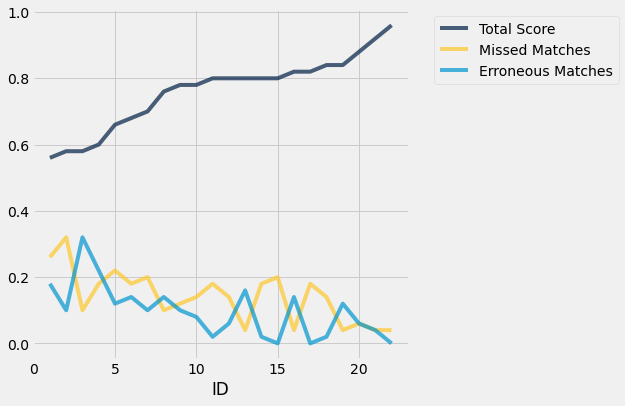

In [156]:
bdattbl = Table().with_columns("Total Score", bcr/50)
bdattbl = bdattbl.with_columns("Missed Matches", bmm/50)
bdattbl = bdattbl.with_columns("Erroneous Matches", bem/50)
bdattbl = bdattbl.sort(bcr)
bdattbl = bdattbl.with_columns("ID", np.arange(1,bdattbl.num_rows+1))
bdattbl.plot("ID")

In [157]:
bdattbl

Total Score,Missed Matches,Erroneous Matches,ID
0.56,0.26,0.18,1
0.58,0.32,0.1,2
0.58,0.1,0.32,3
0.6,0.18,0.22,4
0.66,0.22,0.12,5
0.68,0.18,0.14,6
0.7,0.2,0.1,7
0.76,0.1,0.14,8
0.78,0.12,0.1,9
0.78,0.14,0.08,10


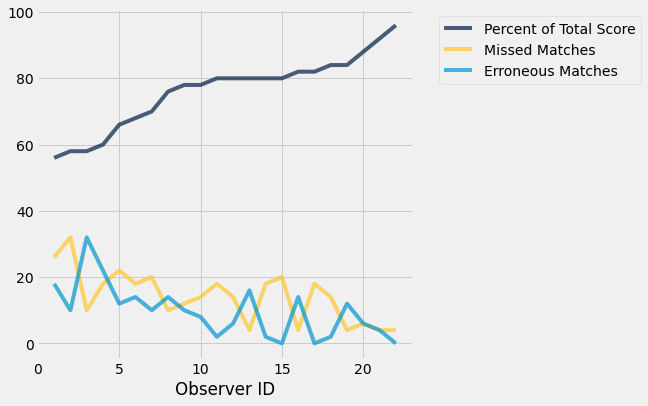

In [158]:
bdattbl = Table().with_columns("Percent of Total Score", bcr*2)
bdattbl = bdattbl.with_columns("Missed Matches", bmm*2)
bdattbl = bdattbl.with_columns("Erroneous Matches", bem*2)
bdattbl = bdattbl.sort(bcr)
bdattbl = bdattbl.with_columns("Observer ID", np.arange(1,bdattbl.num_rows+1))
bdattbl.plot("Observer ID" )

In [159]:
bdattbl.show(22)

Percent of Total Score,Missed Matches,Erroneous Matches,Observer ID
56,26,18,1
58,32,10,2
58,10,32,3
60,18,22,4
66,22,12,5
68,18,14,6
70,20,10,7
76,10,14,8
78,12,10,9
78,14,8,10


In [160]:
cmm = make_array()
cem = make_array()
ccr = make_array()

for i in np.arange(len(Cres_flip.columns)):
    Cmissedmatches = 0
    Cerrormatches = 0
    correct = 0
    for l in np.arange(50):
        if answerkey[l] == "match" and Cres_flip[i][l] == "no match":
            Cmissedmatches = Cmissedmatches + 1
        elif answerkey[l] == "no match" and Cres_flip[i][l] == "match":
            Cerrormatches = Cerrormatches + 1
        else:
            correct = correct+1

    cmm, cem, ccr = np.append(cmm, Cmissedmatches), np.append(cem, Cerrormatches), np.append(ccr, correct)

In [161]:
cmm

array([ 10.,   7.,   8.,   2.,  12.,   8.,   3.,  12.,  13.,  12.,  11.,
         3.,   4.,   6.,   5.,   3.,  13.,   7.,   4.,   7.,   1.,   7.])

In [162]:
cem

array([  4.,   0.,   2.,   7.,   9.,   4.,   8.,   4.,   7.,   6.,   0.,
        12.,  17.,   5.,  10.,   4.,   6.,   2.,   0.,   1.,  14.,   0.])

In [163]:
ccr

array([ 36.,  43.,  40.,  41.,  29.,  38.,  39.,  34.,  30.,  32.,  39.,
        35.,  29.,  39.,  35.,  43.,  31.,  41.,  46.,  42.,  35.,  43.])

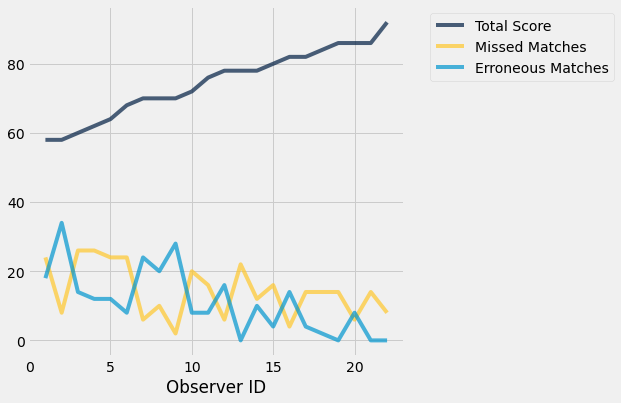

In [164]:
cdattbl = Table().with_columns("Total Score", ccr*2)
cdattbl = cdattbl.with_columns("Missed Matches", cmm*2)
cdattbl = cdattbl.with_columns("Erroneous Matches", cem*2)
cdattbl = cdattbl.sort(ccr)
cdattbl = cdattbl.with_columns("Observer ID", np.arange(1,cdattbl.num_rows+1))
cdattbl.plot("Observer ID")

In [165]:
cdattbl

Total Score,Missed Matches,Erroneous Matches,Observer ID
58,24,18,1
58,8,34,2
60,26,14,3
62,26,12,4
64,24,12,5
68,24,8,6
70,6,24,7
70,10,20,8
70,2,28,9
72,20,8,10


In [166]:
ttest_ind(Bscores, Cscores)

Ttest_indResult(statistic=0.39777191401518719, pvalue=0.69281293723338289)

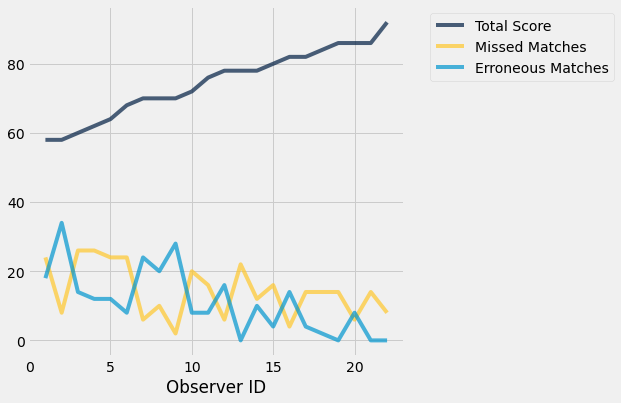

In [167]:
cdattbl.plot("Observer ID")

In [168]:
len(Bscores
   )

22

In [169]:
len(Cscores
   )

22

In [170]:
sum(answerkey == "match")

28

In [171]:
sum(answerkey == "no match")

22

In [172]:
np.mean(bmm/sum(answerkey == "match"))

0.25162337662337664

In [173]:
np.mean(cmm/sum(answerkey == "match"))

0.2564935064935065

In [174]:
np.mean(bem/sum(answerkey == "no match"))

0.22107438016528924

In [175]:
np.mean(cem/sum(answerkey == "no match"))

0.25206611570247933

In [176]:
sem(Bscores)

0.023426474023278056

In [177]:
sem(Cscores)

0.021793817565112204

In [178]:
sum(Bscores > 0.75)/len(Bscores)

0.63636363636363635

In [179]:
sum(Cscores > 0.75)/len(Cscores)

0.54545454545454541

In [180]:
ttest_1samp(Bscores, 0.5)

Ttest_1sampResult(statistic=10.904523881857312, pvalue=4.1651827448740315e-10)

In [181]:
ttest_1samp(Cscores, 0.5)

Ttest_1sampResult(statistic=11.137437119590894, pvalue=2.8449948583966461e-10)

In [182]:
spearmanr(bem, Bscores)

SpearmanrResult(correlation=-0.6333250741774703, pvalue=0.0015560098106081179)

In [183]:
spearmanr(cem, Cscores)

SpearmanrResult(correlation=-0.69369250690659467, pvalue=0.00034311817922369269)

In [184]:
spearmanr(bmm, Bscores)

SpearmanrResult(correlation=-0.64679950711471479, pvalue=0.0011416863342200599)

In [185]:
spearmanr(cmm, Cscores)

SpearmanrResult(correlation=-0.4582030339816841, pvalue=0.031987458831860972)

In [186]:
len(Bres_flip[1])
Bscores = make_array()

for i in np.arange(len(Bres_flip.columns)):
    Bscores = np.append(Bscores, (sum(answerkey == Bres_flip[i]))/50)
Bscores

bmm = make_array() #missed matches in survey B
bem = make_array() #erroneous matches in survey B
bcr = make_array() #correct responses in survey B

for i in np.arange(len(Bres_flip.columns)):
    Bmissedmatches = 0
    Berrormatches = 0
    correct = 0
    for l in np.arange(50):
        if answerkey[l] == "match" and Bres_flip[i][l] == "no match":
            Bmissedmatches = Bmissedmatches + 1
        elif answerkey[l] == "no match" and Bres_flip[i][l] == "match":
            Berrormatches = Berrormatches + 1
        else:
            correct = correct+1

    bmm = np.append(bmm, Bmissedmatches)
    bem = np.append(bem, Berrormatches)
    bcr = np.append(bcr, correct)

    
ttest_1samp(Bscores, 0.5)
spearmanr(bem, Bscores)
spearmanr(bmm, Bscores)


Cscores = make_array()

for i in np.arange(len(Cres_flip.columns)):
    Cscores = np.append(Cscores, (sum(answerkey == Cres_flip[i]))/50)
Cscores

cmm = make_array() #missed matches in survey C
cem = make_array() #erroneous matches in survey C
ccr = make_array() #correct responses in survey C

for i in np.arange(len(Cres_flip.columns)):
    Cmissedmatches = 0
    Cerrormatches = 0
    correct = 0
    for l in np.arange(50):
        if answerkey[l] == "match" and Cres_flip[i][l] == "no match":
            Cmissedmatches = Cmissedmatches + 1
        elif answerkey[l] == "no match" and Cres_flip[i][l] == "match":
            Cerrormatches = Cerrormatches + 1
        else:
            correct = correct+1

    cmm = np.append(cmm, Cmissedmatches)
    cem = np.append(cem, Cerrormatches)
    ccr = np.append(ccr, correct)
    

ttest_1samp(Cscores, 0.5)
spearmanr(cem, Cscores)
spearmanr(cmm, Cscores)

SpearmanrResult(correlation=-0.4582030339816841, pvalue=0.031987458831860972)

In [187]:
#most missed questions
BresM = Bres.drop(0,51)
BresM

Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
no match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,no match,no match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,no match,match,match,match
no match,match,match,match,no match,no match,no match,match,no match,match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,no match,match,no match,no match,no match
no match,match,match,match,match,match,no match,match,match,match,match,match,no match,no match,no match,match,match,no match,match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,match,match,match,match,no match,match,no match,match,match,match,match,no match,match,match,no match,match,match,no match,no match
no match,no match,match,match,no match,no match,no match,match,match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,no match,no match,match,no match,match,match,no match,no match
no match,match,match,match,match,match,no match,match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,match
no match,match,match,match,match,no match,no match,match,no match,no match,match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,no match
no match,match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,no match
no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,match,no match,no match,match,no match,no match,no match
no match,match,match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,match,match,match,match,match,no match,no match,match,match,match,no match,no match,no match,no match,no match,no match,match,no match,match,match,match,match,no match,match,no match,no match,match,no match,no match,match
no match,match,match,match,no match,no match,no match,match,match,m

In [188]:
answerkey

array(['no match', 'match', 'match', 'match', 'no match', 'no match',
       'no match', 'match', 'no match', 'match', 'match', 'no match',
       'no match', 'no match', 'no match', 'match', 'match', 'no match',
       'match', 'match', 'no match', 'match', 'match', 'match', 'match',
       'match', 'match', 'no match', 'match', 'match', 'no match', 'match',
       'match', 'match', 'no match', 'no match', 'match', 'no match',
       'match', 'match', 'no match', 'match', 'no match', 'no match',
       'match', 'no match', 'match', 'match', 'no match', 'no match'],
      dtype='<U8')

In [189]:
missedquestions = make_array()
for i in np.arange(len(answerkey)):
    missedquestions = np.append(missedquestions, sum(BresM[i] != answerkey[i]))
missedquestions

array([  3.,   4.,   1.,   6.,   6.,   7.,   4.,   4.,  12.,  14.,   6.,
         3.,   4.,   5.,   7.,   6.,   1.,   3.,   2.,   6.,   9.,   0.,
         0.,   0.,   2.,   4.,  16.,   6.,   5.,   1.,   2.,  15.,  14.,
         7.,   6.,   5.,  11.,   1.,   2.,  10.,   8.,   7.,   7.,   6.,
         3.,   3.,   1.,   8.,   2.,   4.])

In [190]:
sum(BresM[0] != answerkey[0])

3

In [191]:
sum(BresM[0] == answerkey[0])

19

In [192]:
WrongAnswers = Table().with_columns("Question Number",np.arange(1,51)).with_columns("Number Missed",missedquestions)
WrongAnswers

Question Number,Number Missed
1,3
2,4
3,1
4,6
5,6
6,7
7,4
8,4
9,12
10,14


In [193]:
MostMissed = WrongAnswers.sort(1,descending=True)
MostMissed

Question Number,Number Missed
27,16
32,15
10,14
33,14
9,12
37,11
40,10
21,9
41,8
48,8


In [194]:
MostMissed.show(50)

Question Number,Number Missed
27,16
32,15
10,14
33,14
9,12
37,11
40,10
21,9
41,8
48,8


In [195]:
answerkey[26]

'match'

In [196]:
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

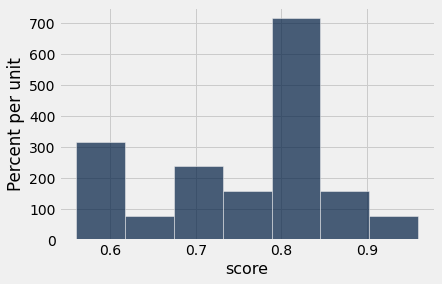

In [197]:
Table().with_column('score', Bscores).hist(bins=7)

In [198]:
CresM = Cres.drop(0,51)
CresM

Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
no match,no match,match,match,match,match,no match,match,no match,no match,match,no match,no match,no match,no match,match,nan,no match,no match,match,no match,no match,match,match,match,no match,no match,no match,no match,no match,no match,match,match,match,no match,no match,no match,no match,match,nan,match,match,no match,no match,no match,no match,match,match,match,no match
no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,no match,no match,no match,no match,no match,no match,no match,match,no match,no match
no match,no match,match,match,no match,no match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,match,match,match,no match,no match,match,match,no match,no match,match,match,no match,no match,match,no match,no match,match,match,match,no match,no match,match,match,no match,match,no match,no match
no match,match,match,match,match,no match,no match,match,no match,match,match,no match,match,no match,match,match,match,no match,match,match,match,match,match,match,match,match,no match,match,match,match,no match,no match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,no match,no match
match,no match,match,no match,match,match,no match,no match,no match,match,match,match,no match,no match,no match,no match,match,no match,no match,match,no match,match,match,match,no match,match,no match,no match,match,match,match,match,no match,no match,match,no match,match,no match,match,no match,no match,no match,no match,match,no match,match,match,match,match,no match
match,match,match,match,no match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,no match,match,no match,match,no match,no match,no match,match,match,no match,match,no match,match,no match,no match,no match,no match,no match,match,no match,match,match,no match,match
no match,match,match,no match,match,match,match,match,no match,no match,no match,no match,no match,no match,no match,match,match,no match,match,match,no match,match,match,match,match,match,match,match,match,match,no match,match,match,match,no match,no match,match,no match,match,match,match,match,match,no match,match,no match,match,match,match,match
no match,match,match,match,no match,match,no match,no match,no match,match,match,no match,no match,no match,match,no match,match,match,no match,match,no match,no match,match,match,match,no match,no match,no match,match,match,no match,no match,no match,match,no match,no match,match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,no match,no match
no match,no match,match,match,match,no match,no match,no match,no match,no match,match,no match,no match,no match,no match,no match,match,match,match,no match,no match,no match,match,match,no match,no match,no match,no match,match,match,match,no match,match,match,match,no match,match,match,match,no match,no match,no match,match,no match,match,no match,no match,match,no match,match
no match,match,no match,no ma

In [199]:
np.arange(CresM.num_rows)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [200]:
np.arange(len(answerkey))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [201]:
CresM[0] != answerkey[0]

array([False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False], dtype=bool)

In [202]:
missedquestionsC = make_array()
for question_number in np.arange(len(answerkey)):
    missedquestionsC = np.append(missedquestionsC, sum(CresM[question_number] != answerkey[question_number]))
missedquestionsC

array([  2.,   6.,   2.,   4.,   8.,  10.,   3.,  15.,   6.,  12.,   3.,
         3.,   4.,   1.,   5.,   5.,   1.,   5.,   5.,   4.,   5.,   4.,
         0.,   0.,   5.,   4.,  17.,   8.,   3.,   1.,   4.,  14.,   9.,
         4.,   9.,   3.,   6.,   3.,   2.,   6.,  12.,  11.,   9.,   4.,
         8.,   8.,   3.,   6.,   5.,   6.])

In [203]:
WrongAnswersC = Table().with_columns("Question Number",np.arange(1,51)).with_columns("Number Missed",missedquestionsC)
WrongAnswersC

Question Number,Number Missed
1,2
2,6
3,2
4,4
5,8
6,10
7,3
8,15
9,6
10,12


In [204]:
MostMissedC = WrongAnswersC.sort(1,descending=True)
MostMissedC.show(10)

Question Number,Number Missed
27,17
8,15
32,14
10,12
41,12
42,11
6,10
33,9
35,9
43,9


In [205]:
missedquestionsB = make_array()
for question_number in np.arange(len(answerkey)):
    missedquestionsB = np.append(missedquestionsB, sum(BresM[question_number] != answerkey[question_number]))
missedquestionsB
WrongAnswersB = Table().with_columns("Question Number",np.arange(1,51)).with_columns("Number Missed",missedquestionsB)
MostMissedB = WrongAnswersB.sort(1,descending=True)
MostMissedB.show(50)

Question Number,Number Missed
27,16
32,15
10,14
33,14
9,12
37,11
40,10
21,9
41,8
48,8


In [206]:
CresM[0]

array(['no match', 'no match', 'no match', 'no match', 'match', 'match',
       'no match', 'no match', 'no match', 'no match', 'no match',
       'no match', 'no match', 'no match', 'no match', 'no match',
       'no match', 'no match', 'no match', 'no match', 'no match',
       'no match'],
      dtype='<U8')

In [207]:
np.arange(CresM.num_rows)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [208]:
len(Bres)


52

In [209]:
Bscores

array([ 0.68,  0.96,  0.82,  0.84,  0.84,  0.76,  0.8 ,  0.8 ,  0.7 ,
        0.8 ,  0.78,  0.8 ,  0.8 ,  0.88,  0.82,  0.56,  0.58,  0.68,
        0.66,  0.88,  0.58,  0.6 ])

In [210]:
bem

array([  7.,   0.,   7.,   1.,   6.,   7.,   1.,   3.,   5.,   8.,   5.,
         1.,   0.,   3.,   0.,   9.,   5.,   4.,   6.,   2.,  16.,  11.])

In [211]:
bmm

array([  9.,   2.,   2.,   7.,   2.,   5.,   9.,   7.,  10.,   2.,   6.,
         9.,  10.,   3.,   9.,  13.,  16.,   7.,  11.,   2.,   5.,   9.])

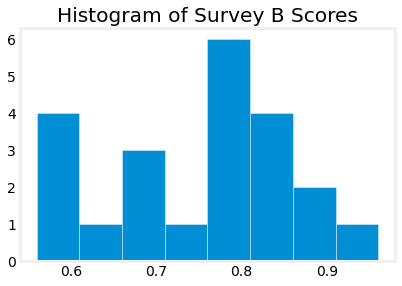

In [212]:
binwidth = 0.05
plt.figure(facecolor='white')
ax = plt.axes()
plt.hist(Bscores, bins=np.arange(min(Bscores), max(Bscores) + binwidth, binwidth))
plt.title('Histogram of Survey B Scores')
plt.grid(False)
ax.set_facecolor("white")

plt.show()

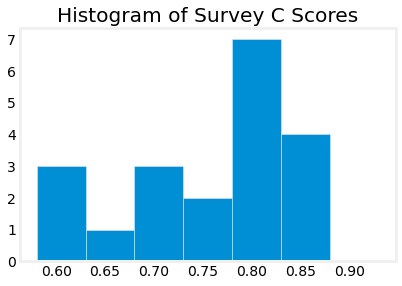

In [213]:
binwidth = 0.05
plt.figure(facecolor='white')
ax = plt.axes()
plt.hist(Bscores, bins=np.arange(min(Cscores), max(Cscores) + binwidth, binwidth))
plt.title('Histogram of Survey C Scores')
plt.grid(False)
ax.set_facecolor("white")

plt.show()

Text(0.5, 0, 'Participant ID number')

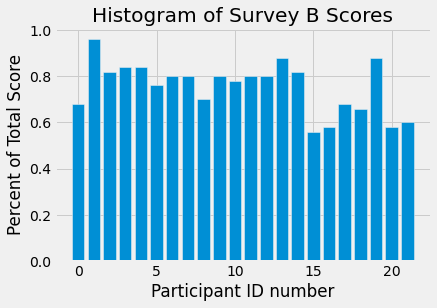

In [214]:
ax=plt.axes()
plt.bar(np.arange(0,len(Bscores)),Bscores)
plt.title('Histogram of Survey B Scores')
ax.set_ylabel('Percent of Total Score')
ax.set_xlabel('Participant ID number')

NameError: name 'IT' is not defined

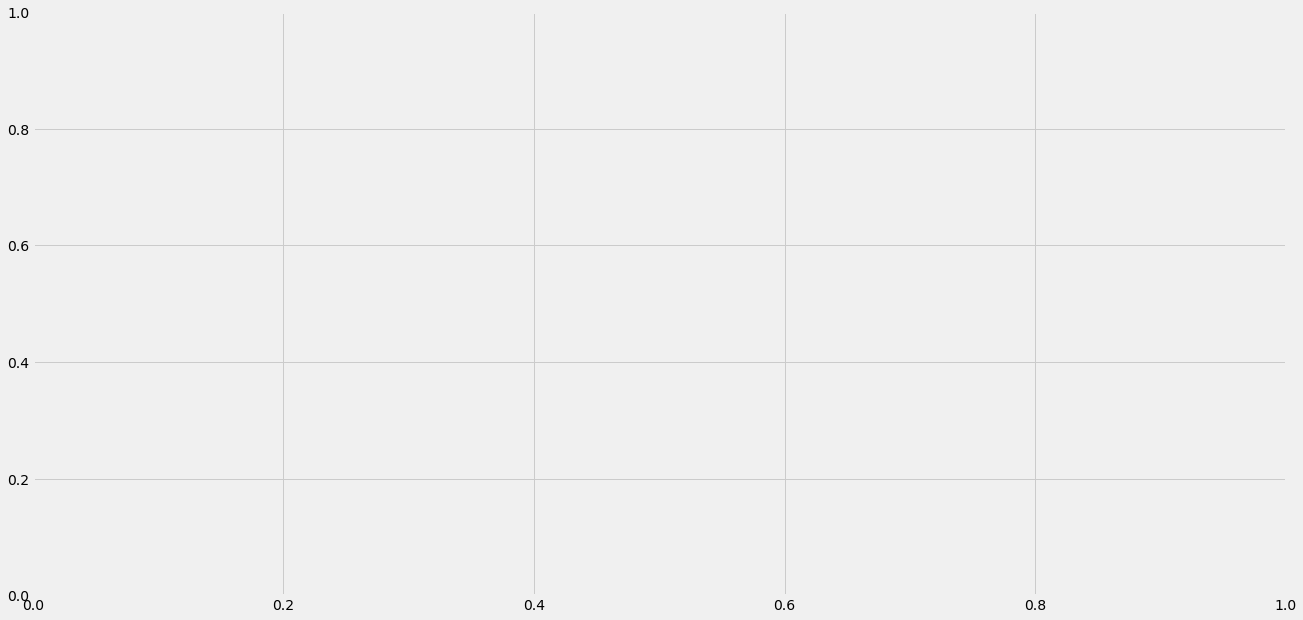

In [215]:
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(20, 10))

 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, bcr/50, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Correct')
plt.bar(br2, bmm/50, color ='red', width = barWidth,
        edgecolor ='grey', label ='Missed Match')
plt.bar(br3, bem/50, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Erroneous Match')
 
plt.title("Survey B Scores")
# Adding Xticks
plt.xlabel('Participant ID number', fontsize = 15)
plt.ylabel('Percent of Total Score',  fontsize = 15)

# Adding Xticks
#plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.legend()


plt.show()

In [ ]:
Bscores

In [216]:
bmm+bem+bcr

array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.])

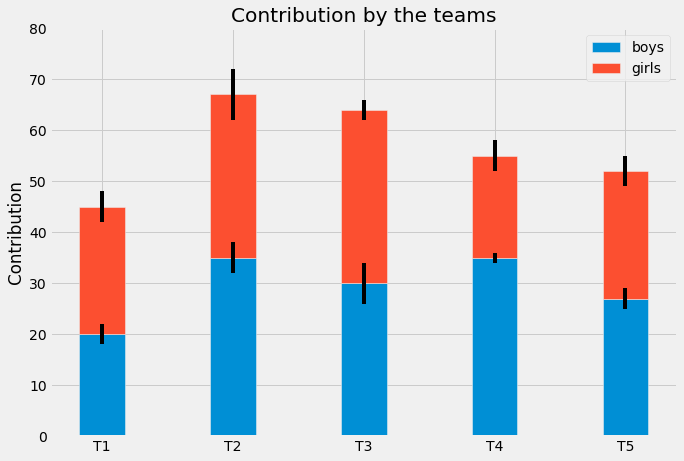

In [217]:
N = 5
 
boys = (20, 35, 30, 35, 27)
girls = (25, 32, 34, 20, 25)
boyStd = (2, 3, 4, 1, 2)
girlStd = (3, 5, 2, 3, 3)
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, boys, width, yerr = boyStd)
p2 = plt.bar(ind, girls, width,
             bottom = boys, yerr = girlStd)
 
plt.ylabel('Contribution')
plt.title('Contribution by the teams')
plt.xticks(ind, ('T1', 'T2', 'T3', 'T4', 'T5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('boys', 'girls'))
 
plt.show()

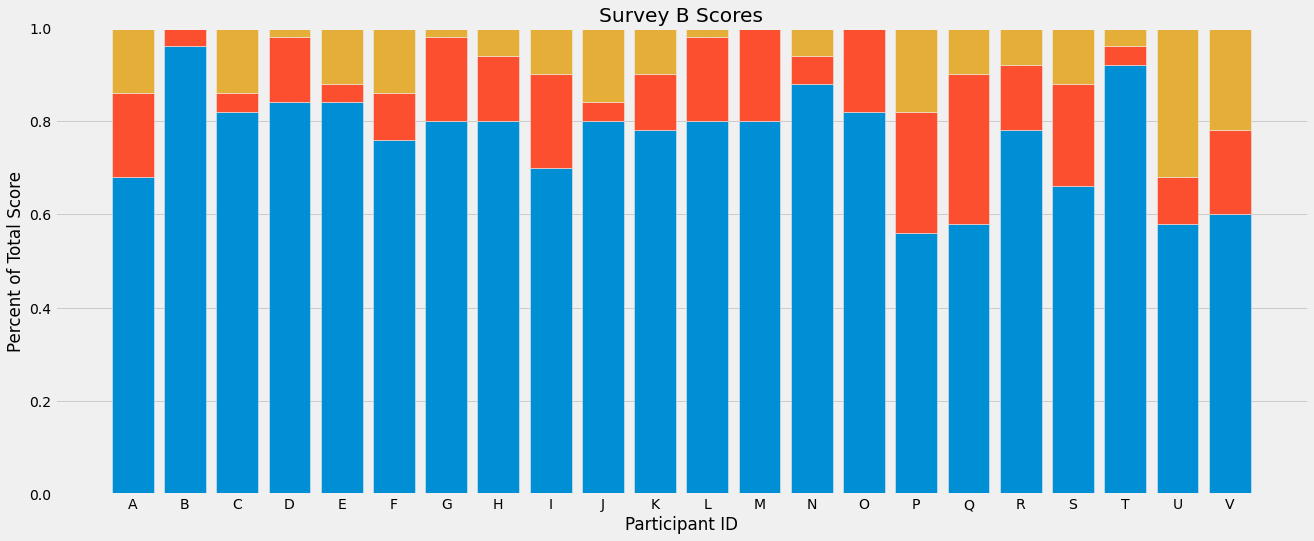

In [239]:
N = len(bcr)
 

ind = np.arange(N)  
width = 0.8
 
fig, ax = plt.subplots(figsize =(20, 8))
p1 = plt.bar(ind, bcr/50, width)
p2 = plt.bar(ind, bmm/50, width,
             bottom = bcr/50)
p3 = plt.bar(ind, bem/50, width,
             bottom = bcr/50+bmm/50)
plt.ylabel('Percent of Total Score')
plt.xlabel('Participant ID')
plt.title('Survey B Scores')

#plt.legend((p1[0], p2[0], p3[0]), ('Correct Response', 'Flase Negative', 'False Positive'))
ax.set_xticks(ind)
ax.set_xticklabels(("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V"))
 
plt.show()

In [219]:
np.zeros(len(bcr))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [220]:
cmm+cem+ccr

array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.])

In [230]:
make_array()

array([], dtype=float64)

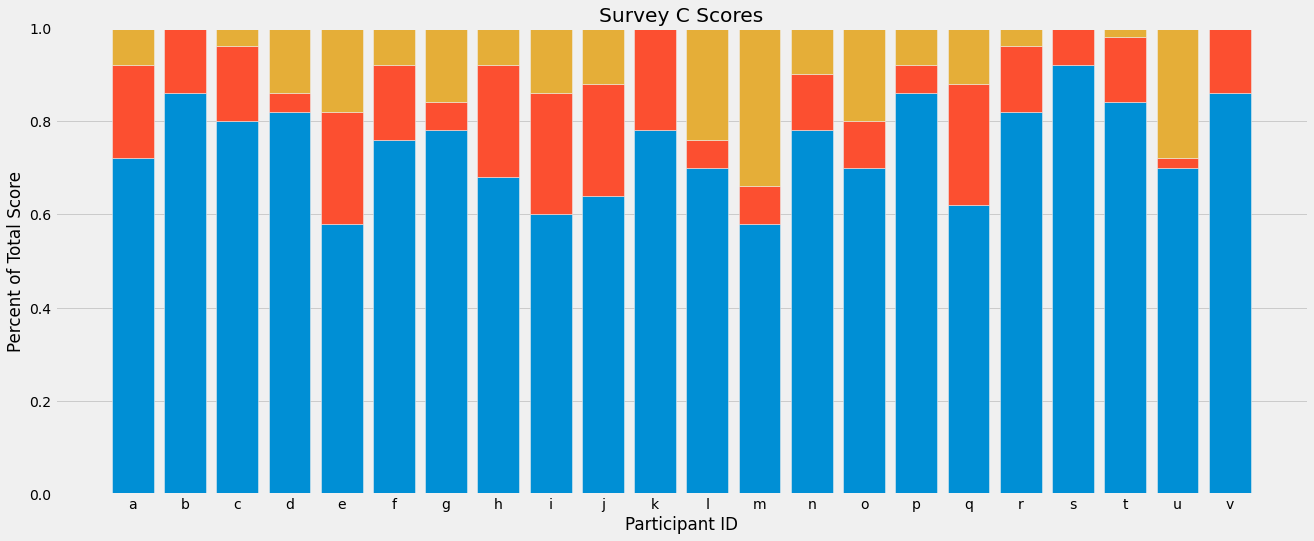

In [240]:
N = len(ccr)
 

ind = np.arange(N)  
width = 0.8
 
fig, ax = plt.subplots(figsize =(20, 8))
p1 = plt.bar(ind, ccr/50, width)
p2 = plt.bar(ind, cmm/50, width,
             bottom = ccr/50)
p3 = plt.bar(ind, cem/50, width,
             bottom = ccr/50+cmm/50)
plt.ylabel('Percent of Total Score')
plt.xlabel('Participant ID')
plt.title('Survey C Scores')

#plt.legend((p1[0], p2[0], p3[0]), ('Correct Response', 'Missed Match', 'Erroneous Match'))
ax.set_xticks(ind)
ax.set_xticklabels(("a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v"))
 
 
plt.show()